### IPL 2022 Capstone Project

In [6]:
# Load Libraries and Dataset:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('IPL.csv')
df.head()



,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [7]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [8]:
df.shape

(74, 20)

In [9]:
# Lets seee null value in our dataset 
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

In [10]:
# Now come to the question part

In [15]:
# 1. Which team won the most matches
match_wins = df['match_winner'].value_counts()
# so its give me a series of all team who won the matches, and i stored it variable
# Now I use that series and create a barplot, I can create a countplot, but barplot is more suitable for thos.
# Because we have one column of numerical data and other one is categorical
match_wins


match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Most match win by teams')

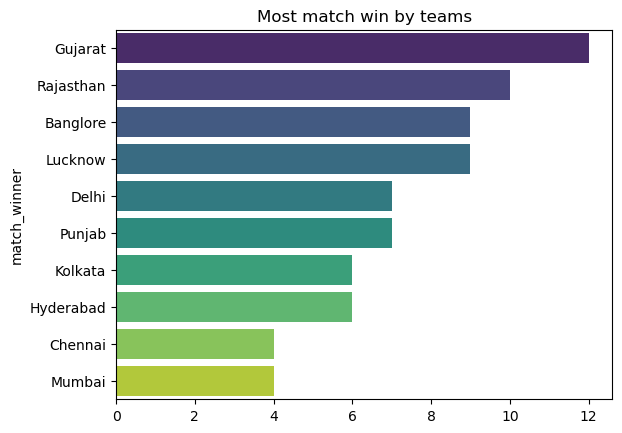

In [19]:
# BARPLOT of match_wins   ------- 
sns.barplot(y= match_wins.index, x= match_wins.values, palette='viridis')

# Change the axis , beacuse its overap if i give index on x axis
# here we can also use matplotlib for title 
plt.title("Most match win by teams")

Text(0.5, 1.0, 'Toss Decision Trends')

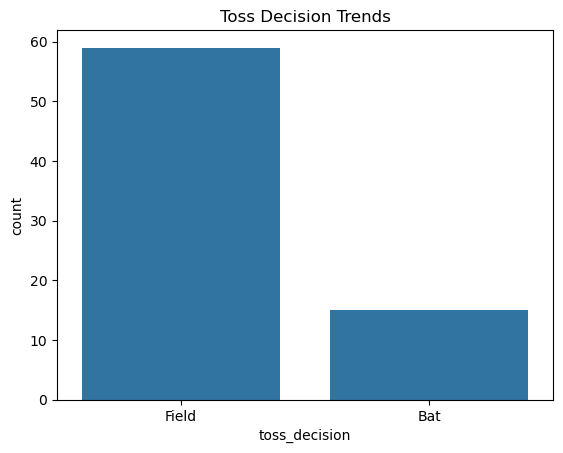

In [22]:
# 2. Toss Decision Trends:- Bat/Field
# so here i use count plot, because I only want to count the decision of bat or field

sns.countplot(x = df['toss_decision'])
#  so there are mostof the team choose to field first out of 74 matches.
plt.title("Toss Decision Trends")

In [26]:
# 3. Toss winner vs Match winner
# So this is the question where we have to analyze something , not visualize.
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
#  now I want result in percentage 
percentage = (count *100)/df.shape[0]
percentage


48.648648648648646

Text(0.5, 1.0, '--Won By--')

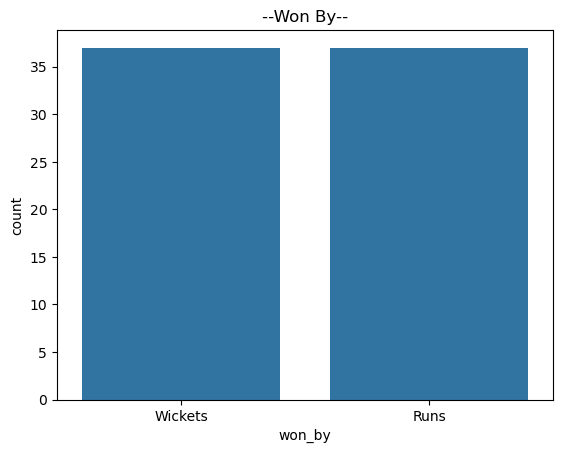

In [28]:
# 4. How do teams win? won by :-(RUNS vs WICKETS)
sns.countplot(x=df['won_by'])
#  so here 37 matches won by runs and 37 won by wickets
plt.title('--Won By--')


In [32]:
# Key player Performances:-
# 5. Top 10 -- 'Player of the Match' Awards:-
count = df['player_of_the_match'].value_counts().head(10)
count


player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Players - Man of the Match')

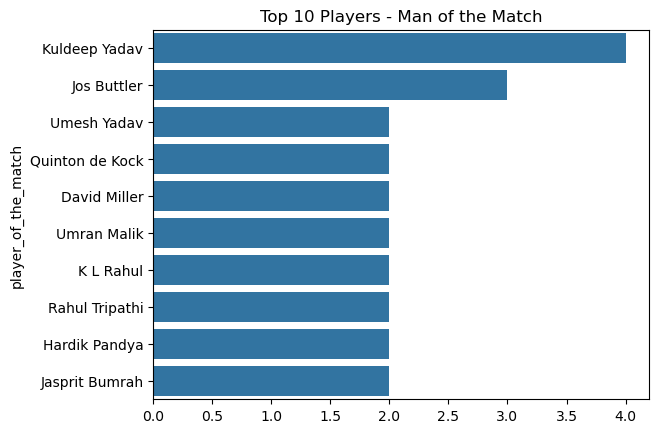

In [34]:
# Use barplot for visualization -- for better understanding
sns.barplot(x= count.values , y= count.index)
plt.title("Top 10 Players - Man of the Match")

In [38]:
# 6. Two Top Scorer:-
# So we have two column , top_scorer - player name AND highscore - Player runs
# When we have two column , we can us group by function
# so here i use group by on top scprer column
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

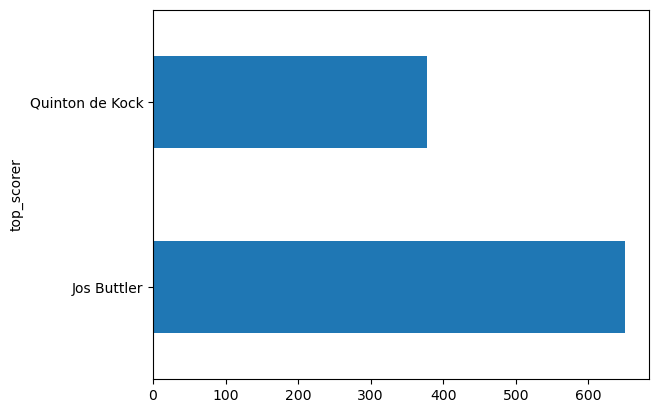

In [41]:
high.plot(kind='barh')
# simply create a plot for this two top scorer and pass 'barh' for horizontal view


<Axes: ylabel='best_bowling'>

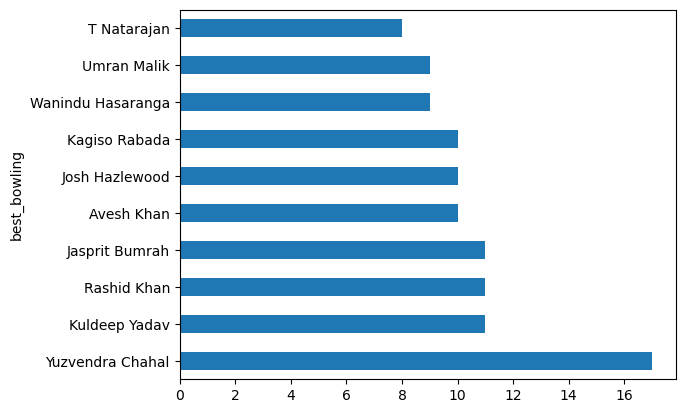

In [50]:
# 7. 10 Best Bowling Figures:-
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x :x.split('--')[0])

#  Here i make a new column highest_wickets to get only only wickets, but its come in the string because I use split there.
#  so here i can change the datatype 
df['highest_wickets'] = df['highest_wickets'].astype(int)
# so now again i use group by , for grouping their name
top_bowlers = df.groupby("best_bowling")['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

#  Now I visualize this:- Plot on bargraph
top_bowlers.plot(kind='barh')

In [52]:
# 8. Most Matches played by venue

venue_count = df['venue'].value_counts()
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

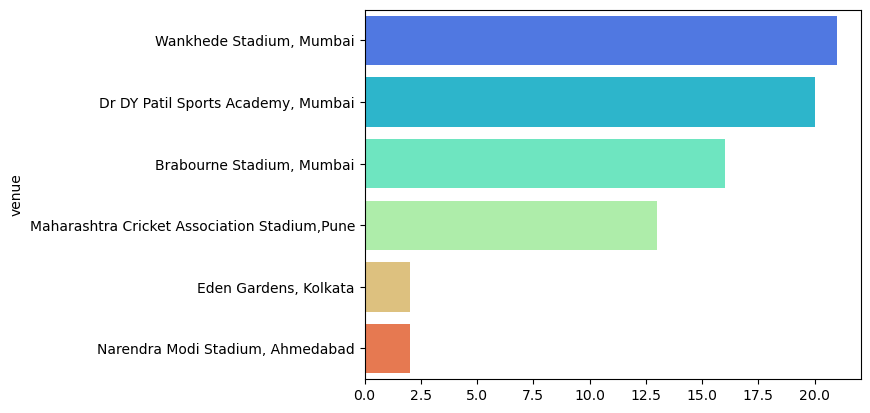

In [55]:
#  Now visualize on the basis of venue counts:-
sns.barplot(x=venue_count.values,y=venue_count.index,palette='rainbow')

In [56]:
################################################################################################################################################################################################################################################################################################
# CUSTOMS QUESTIONS:-
# Q1. Who won the highest margins by runs?
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]


,match_winner,margin
54,Chennai,91


In [58]:
# Q2. Which player had the highest individual score?
df[df['highscore']== df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [59]:
# Q3. Which bowler had the best bowling figures?
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
